# Twitter Report
## October 25, 2022
### By: Michael Schoeppner 

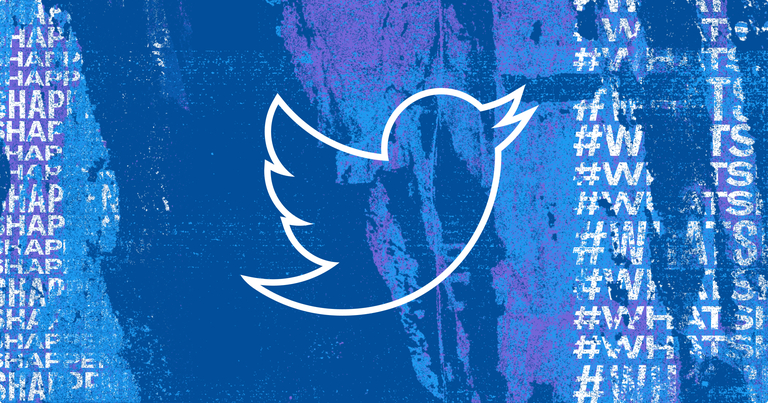

For this report, I will be analyzing Twitter data in the hopes of having a well-executed query on the thing I requested from Twitter. In doing this, I will gather enough data to generate the right amount of data required for this report. The query I will be using in this report will be on one of my interests, which is video gaming. I will use a specific gaming platform and even go as far as to narrow it down to one specific game or developer. However, if the query is received in a low code range, I will have to revise it to be more general. In the rare case there is too much data received, I will have to specify my query even further than I expected. I hope to gather this information while also making sure no other content is grouped with the query I received. In the end, I hope not to run into any issues, though in many cases, things will not go according to plan and I will adapt, even if that means changing my query in the end.

Throughout the process of this report, it has been a rough walk through, to say the least. The process of going through the process of making sure I put in the correct information regarding calling certain programs, as well as making sure the spelling was correct or if there were too many spaces, ended up being the issue half of the time. The raw data gave me a clear message of the tweets I got regarding my topic, "MANOR LORDS." This topic is about an indie PC video game I follow on Twitter. I tried doing this query before but did not get the right raw information, so this time I was able to get the right information. I made sure I put "from" to call the certain account as well as sort of the types of languages by making sure it was only English in the end. I did run into issues towards the end, such as only receiving 10 tweets at a time, but eventually going through it with someone in class, I had it set to only give me 10 tweets at a time. Going through the process of elimination was the biggest thing I ran into.

Overall, I was happy with my findings as this was the perfect time for me to get information on this Twitter account as they announced a free beta test for the game they are releasing. The information will give me a good idea of what viewers and players think of the soon-to-be finished game, as well as what needs to be fixed in order to make it better for when it is released. The release was a short one, so only a limited number of people were able to play it, but very big Twitch gamers were able to play it, so others could watch them and give their feedback about it.

Also could not remember if you said to put the comments above or bellow the code but I ended up putting it below. 

Below is the Code of this Twitter Report 

In [77]:
import pandas as pd
import json
import requests
import urllib

In [ ]:
ls

This information is letting me know the files names within my EMAT jupyter folder. I also cleared it because I did not know if we should have this information on the web for others to see. 

In [79]:
bearer_token = pd.read_csv("Twitter_Token_9-22-22.txt")

This is calling out the bearer token I received from twitter in the developer portal. 

In [ ]:
bearer_token['Bearer_Token'].iloc[0]

In [81]:
header = {'Authorization':'Bearer {}'.format(bearer_token['Bearer_Token'][0])}

In [ ]:
header

In [83]:
endpoint = 'https://api.twitter.com/2/tweets/search/recent'

In [84]:
query_txt = 'lang:eng'

This is where I made that I would only receive English only tweets.

In [85]:
query_param = urllib.parse.quote('(from:"MANOR LORDS") OR (PC OR(STEAM OR (Game ("MANOR LORDS"))))lang:en -is:retweet')

This is the information I am looking for from Twitter. 

In [86]:
query_param

'%28from%3A%22MANOR%20LORDS%22%29%20OR%20%28PC%20OR%28STEAM%20OR%20%28Game%20%28%22MANOR%20LORDS%22%29%29%29%29lang%3Aen%20-is%3Aretweet'

In [87]:
expansions = 'entities.mentions.username'

In [88]:
user_fields = 'username'

In [89]:
tweet_fields = 'author_id,public_metrics,lang,created_at'

In [90]:
media_fields = 'duration_ms,height,width,url'

In [91]:
query_url = endpoint + '?query={}&media.fields={}&tweet.fields={}&expansions={}'.format(query_param, media_fields, tweet_fields, expansions)

In [92]:
query_url

'https://api.twitter.com/2/tweets/search/recent?query=%28from%3A%22MANOR%20LORDS%22%29%20OR%20%28PC%20OR%28STEAM%20OR%20%28Game%20%28%22MANOR%20LORDS%22%29%29%29%29lang%3Aen%20-is%3Aretweet&media.fields=duration_ms,height,width,url&tweet.fields=author_id,public_metrics,lang,created_at&expansions=entities.mentions.username'

In [93]:
response = requests.get(query_url, headers = header)

In [94]:
response.status_code

200

In [95]:
response.text

'{"data":[{"created_at":"2022-10-25T20:39:17.000Z","author_id":"145966047","public_metrics":{"retweet_count":0,"reply_count":0,"like_count":0,"quote_count":0},"text":"@Micmic8872 @the_moops @rottingpastry1 @Caffeine_Gene @Jdsthebest @throne_scott @JonSmit72519389 .\\nIt\'s easier for anti vaxxers to imagine a ship is sinking while we steam full speed ahead, partying on deck, as you cower on shore fearing vaccines that 5 BILLION of us have taken without incident.","edit_history_tweet_ids":["1585008117301252096"],"id":"1585008117301252096","lang":"en","entities":{"mentions":[{"start":0,"end":11,"username":"Micmic8872","id":"39727103"},{"start":12,"end":22,"username":"the_moops","id":"1439319192914874371"},{"start":23,"end":38,"username":"rottingpastry1","id":"1279801142571139074"},{"start":39,"end":53,"username":"Caffeine_Gene","id":"22417626"},{"start":54,"end":65,"username":"Jdsthebest","id":"836335634151161856"},{"start":66,"end":79,"username":"throne_scott","id":"1511013860626604040"

This means the query I used was good enough to call information from twitter and that there was no error.

In [96]:
response_dict = json.loads(response.text)

In [97]:
response_dict.keys()

dict_keys(['data', 'includes', 'meta'])

In [98]:
response_dict['data'][0].keys()

dict_keys(['created_at', 'author_id', 'public_metrics', 'text', 'edit_history_tweet_ids', 'id', 'lang', 'entities'])

In [99]:
response_dict['data'][0]['text']

"@Micmic8872 @the_moops @rottingpastry1 @Caffeine_Gene @Jdsthebest @throne_scott @JonSmit72519389 .\nIt's easier for anti vaxxers to imagine a ship is sinking while we steam full speed ahead, partying on deck, as you cower on shore fearing vaccines that 5 BILLION of us have taken without incident."

In [100]:
response_dict['data'][0]['public_metrics'].keys()

dict_keys(['retweet_count', 'reply_count', 'like_count', 'quote_count'])

In [101]:
response_dict['data'][0]['public_metrics']['like_count']

0

In [102]:
response_dict['data'][4]['id']

'1585008100154650624'

In [103]:
response_df = pd.DataFrame(response_dict['data'])
response_df2 = response_df

In [104]:
response_df

created_at            author_id  \
0  2022-10-25T20:39:17.000Z            145966047   
1  2022-10-25T20:39:17.000Z            567427617   
2  2022-10-25T20:39:17.000Z  1118263646621188096   
3  2022-10-25T20:39:16.000Z  1439357477733081090   
4  2022-10-25T20:39:13.000Z   754727244522786817   
5  2022-10-25T20:39:13.000Z  1470888549356507137   
6  2022-10-25T20:39:10.000Z  1068787774919241728   
7  2022-10-25T20:39:07.000Z            102618060   
8  2022-10-25T20:39:07.000Z  1037259086511755264   

                                      public_metrics  \
0  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
1  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
2  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
3  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
4  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
5  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
6  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
7  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
8  {'retweet_count': 0, 'reply_count': 0, 'like_c...   

                                                text edit_history_tweet_ids  \
0  @Micmic8872 @the_moops @rottingpastry1 @Caffei...  [1585008117301252096]   
1  We'll eat your steam and lap up your blood. Bu...  [1585008116655132673]   
2  For me Vampire Survivor could be the only game...  [1585008114625314817]   
3  Looking good for my PC UPS 🔥👀 https://t.co/Rgz...  [1585008112821768192]   
4  @daqlol @OverwatchNaeri I have it on pc as wel...  [1585008100154650624]   
5  @Padraic92996190 @jcalvinogt much wow jcalvino...  [1585008098036555777]   
6            @LittleTurtleVT You need a Steam deck 🤣  [1585008085470687232]   
7  @nakikamizuki Steam watching Naki -&gt; steam ...  [1585008075030769664]   
8  @RoryPlays_ I'd have to think about it to see ...  [1585008073332396032]   

                    id lang                                           entities  
0  1585008117301252096   en  {'mentions': [{'start': 0, 'end': 11, 'usernam...  
1  1585008116655132673   en                                                NaN  
2  1585008114625314817   en                                                NaN  
3  1585008112821768192   en                                                NaN  
4  1585008100154650624   en  {'mentions': [{'start': 0, 'end': 7, 'username...  
5  1585008098036555777   en  {'mentions': [{'start': 0, 'end': 16, 'usernam...  
6  1585008085470687232   en  {'mentions': [{'start': 0, 'end': 15, 'usernam...  
7  1585008075030769664   en  {'mentions': [{'start': 0, 'end': 13, 'usernam...  
8  1585008073332396032   en  {'mentions': [{'start': 0, 'end': 11, 'usernam...

I am putting the information I received from Twitter into a dictionary, which is easier to read and organize at the same time.

In [105]:
public_metrics_df = pd.DataFrame(list(response_df['public_metrics']))

In [106]:
public_metrics_df

retweet_count  reply_count  like_count  quote_count
0              0            0           0            0
1              0            0           0            0
2              0            0           0            0
3              0            0           1            0
4              0            0           0            0
5              0            0           0            0
6              0            0           0            0
7              0            0           0            0
8              0            0           0            0

In [107]:
response_df['retweets'] = public_metrics_df['retweet_count']
response_df['replies'] = public_metrics_df['reply_count']
response_df['likes'] = public_metrics_df['like_count']
response_df['quotes'] = public_metrics_df['quote_count']

In [108]:
response_df2 = response_df2.join(public_metrics_df)

In [109]:
response_df.head()

created_at            author_id  \
0  2022-10-25T20:39:17.000Z            145966047   
1  2022-10-25T20:39:17.000Z            567427617   
2  2022-10-25T20:39:17.000Z  1118263646621188096   
3  2022-10-25T20:39:16.000Z  1439357477733081090   
4  2022-10-25T20:39:13.000Z   754727244522786817   

                                      public_metrics  \
0  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
1  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
2  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
3  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
4  {'retweet_count': 0, 'reply_count': 0, 'like_c...   

                                                text edit_history_tweet_ids  \
0  @Micmic8872 @the_moops @rottingpastry1 @Caffei...  [1585008117301252096]   
1  We'll eat your steam and lap up your blood. Bu...  [1585008116655132673]   
2  For me Vampire Survivor could be the only game...  [1585008114625314817]   
3  Looking good for my PC UPS 🔥👀 https://t.co/Rgz...  [1585008112821768192]   
4  @daqlol @OverwatchNaeri I have it on pc as wel...  [1585008100154650624]   

                    id lang  \
0  1585008117301252096   en   
1  1585008116655132673   en   
2  1585008114625314817   en   
3  1585008112821768192   en   
4  1585008100154650624   en   

                                            entities  retweets  replies  \
0  {'mentions': [{'start': 0, 'end': 11, 'usernam...         0        0   
1                                                NaN         0        0   
2                                                NaN         0        0   
3                                                NaN         0        0   
4  {'mentions': [{'start': 0, 'end': 7, 'username...         0        0   

   likes  quotes  
0      0       0  
1      0       0  
2      0       0  
3      1       0  
4      0       0

In [ ]:
response_dict['meta']['next_token']

I cleared this token because I remember you telling us in class that we don't want these on the web.

In [111]:
next_query_url = query_url + "&next_token={}".format(response_dict['meta']['next_token'])

In [112]:
next_response = requests.get(next_query_url, headers = header)

In [113]:
next_response.status_code

200

In [114]:
next_response.text

'{"data":[{"text":"My laptop\'s fucked :(\\n\\nNow I only have my phone, my desktop PC and my steam deck to keep up with the world. Maybe my amazon tablet, too, but I haven\'t used it in ages so I don\'t know if it still works.","id":"1585008068525363200","edit_history_tweet_ids":["1585008068525363200"],"author_id":"974057051503685632","created_at":"2022-10-25T20:39:06.000Z","lang":"en","public_metrics":{"retweet_count":0,"reply_count":0,"like_count":0,"quote_count":0}},{"entities":{"mentions":[{"start":0,"end":12,"username":"itsmikeytho","id":"1317184149342605313"}]},"text":"@itsmikeytho im on pc","id":"1585008062762348544","edit_history_tweet_ids":["1585008062762348544"],"author_id":"1436452779393011712","created_at":"2022-10-25T20:39:04.000Z","lang":"en","public_metrics":{"retweet_count":0,"reply_count":0,"like_count":0,"quote_count":0}},{"text":"Make sure to enter this awesome $2,000 RTX 3070 Gaming PC. Enter here: https://t.co/00nkFvJNI2 #VastGiveaway #Giveaway #FreePC #GamingPC",

In [115]:
next_response_dict = json.loads(next_response.text)

In [116]:
next_response_dict['meta']

{'newest_id': '1585008068525363200',
 'oldest_id': '1585008023122366464',
 'result_count': 10,
 'next_token': 'b26v89c19zqg8o3fpzeljijvi1vm47stg7474rvsr6gl9'}

In [117]:
def twt_recent_search (query, num_pages, header):
    response_list = []
    next_token = ''
    for i in range(0, num_pages):
        if i > 0:
            this_query = query + "&next_token={}".format(next_token)
        else:
            this_query = query
        
        this_response = requests.get(this_query, headers = header)
        print(this_response.status_code)
        this_response_dict = json.loads(this_response.text)
        response_list.append(this_response_dict)
        next_token = this_response_dict['meta']['next_token']
        
    return response_list

In [118]:
my_responses = twt_recent_search(query_url, 50, header)

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [119]:
results_1 = pd.DataFrame.from_records(my_responses)

In [120]:
data_list = list(results_1['data'])

In [121]:
data_list_of_dfs = [pd.DataFrame(x) for x in data_list]

In [122]:
data_df = pd.concat(data_list_of_dfs)

In [123]:
data_df.head()

author_id                   id lang edit_history_tweet_ids  \
0            145966047  1585008117301252096   en  [1585008117301252096]   
1            567427617  1585008116655132673   en  [1585008116655132673]   
2  1118263646621188096  1585008114625314817   en  [1585008114625314817]   
3  1439357477733081090  1585008112821768192   en  [1585008112821768192]   
4   754727244522786817  1585008100154650624   en  [1585008100154650624]   

                                            entities  \
0  {'mentions': [{'start': 0, 'end': 11, 'usernam...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  {'mentions': [{'start': 0, 'end': 7, 'username...   

                                      public_metrics  \
0  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
1  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
2  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
3  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
4  {'retweet_count': 0, 'reply_count': 0, 'like_c...   

                 created_at                                               text  
0  2022-10-25T20:39:17.000Z  @Micmic8872 @the_moops @rottingpastry1 @Caffei...  
1  2022-10-25T20:39:17.000Z  We'll eat your steam and lap up your blood. Bu...  
2  2022-10-25T20:39:17.000Z  For me Vampire Survivor could be the only game...  
3  2022-10-25T20:39:16.000Z  Looking good for my PC UPS 🔥👀 https://t.co/Rgz...  
4  2022-10-25T20:39:13.000Z  @daqlol @OverwatchNaeri I have it on pc as wel...

In [124]:
len(data_df.index)

493

This is the number of tweets I ended up getting back from Twitter, which is over the amount I needed, which tells me I do not need to worry about changing the query to be something more broad or narrow it down.

In [126]:
Twitter_txt_Report = data_df.to_csv('Twitter text Report.ipynb.csv', index=False)

This is the final data frame turned to csv but hopefully I did this correct in the end. I looked it up online and this is what it said to do. It did not give me an error so I am assuming the data frame works and this is what you wanted in the end. 